In [ ]:
#Importing Libraries
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


Saving HousingData.csv to HousingData (1).csv


In [ ]:
#Loading the Dataset
housing = pd.read_csv("HousingData.csv")
housing.dropna(inplace=True)

#Check for missing values
print(housing.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


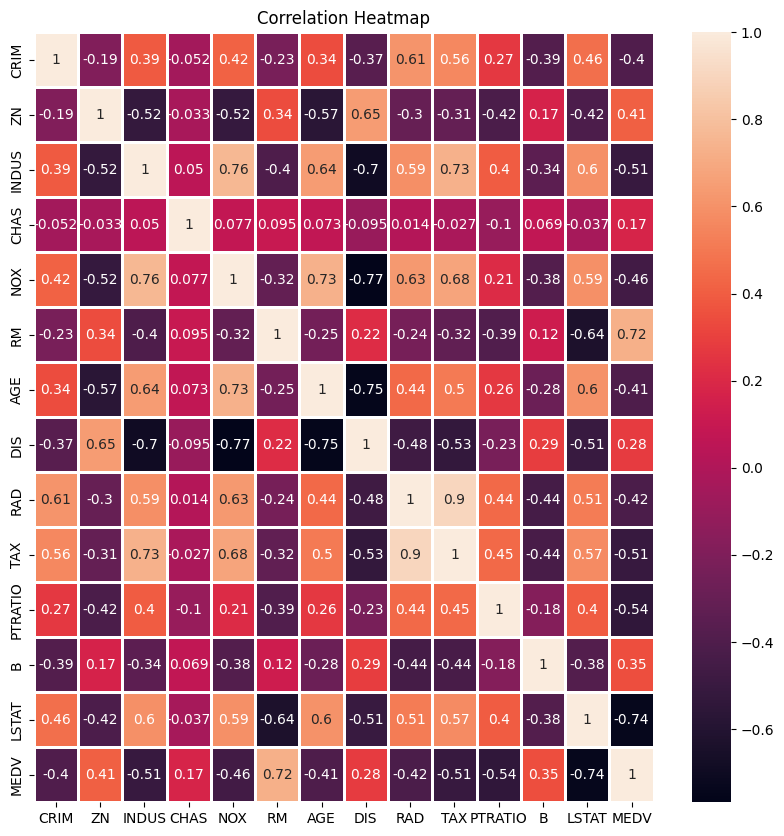

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(housing.corr(), annot=True, linewidths=1)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#K-means Clustering
k = 3
data_sample = housing[['CRIM', 'MEDV']]

kmeans_model = KMeans(n_clusters=k)
kmeans_labels = kmeans_model.fit_predict(data_sample)
data_sample['KMeans_Labels'] = kmeans_labels

# Performance of K-means
kmeans_silhouette = silhouette_score(data_sample[['CRIM', 'MEDV']], kmeans_labels)
print(f'Silhouette Score for K-means: {kmeans_silhouette:.2f}')


Silhouette Score for K-means: 0.55


<ipython-input-25-3ed8877d3752>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['KMeans_Labels'] = kmeans_labels


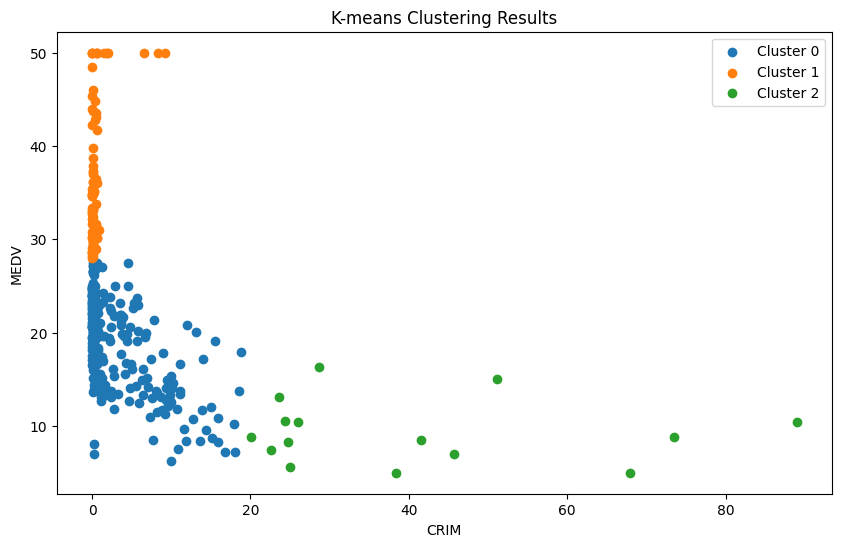

In [ ]:
#K-means Clustering Visualization
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(data_sample[data_sample['KMeans_Labels'] == i]['CRIM'],
                data_sample[data_sample['KMeans_Labels'] == i]['MEDV'],
                label=f'Cluster {i}')
plt.title('K-means Clustering Results')
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.legend()
plt.show()


In [ ]:
#Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=k)
hierarchical_labels = hierarchical_model.fit_predict(data_sample[['CRIM', 'MEDV']])
data_sample['Hierarchical_Labels'] = hierarchical_labels

#Performance of Hierarchical Clustering
hierarchical_silhouette = silhouette_score(data_sample[['CRIM', 'MEDV']], hierarchical_labels)
print(f'Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette:.2f}')


Silhouette Score for Hierarchical Clustering: 0.53


<ipython-input-27-82d20ad42d6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['Hierarchical_Labels'] = hierarchical_labels


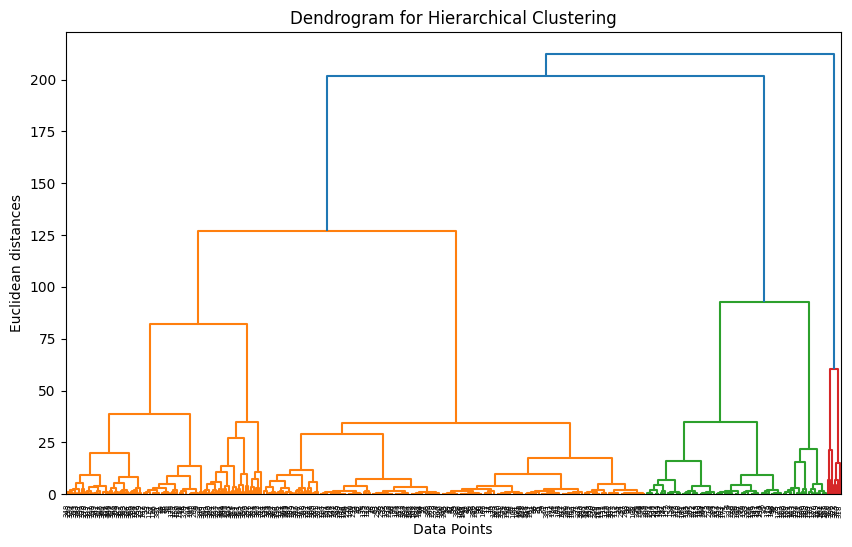

In [ ]:
#Hierarchical Clustering Visualization (Dendrogram)
plt.figure(figsize=(10, 6))
linked = linkage(data_sample[['CRIM', 'MEDV']], method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distances')
plt.show()


In [ ]:
#DBSCAN Clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(data_sample[['CRIM', 'MEDV']])
data_sample['DBSCAN_Labels'] = dbscan_labels

#Performance of DBSCAN
if len(set(dbscan_labels)) > 1:  #Check if more than one cluster was formed
    dbscan_silhouette = silhouette_score(data_sample[['CRIM', 'MEDV']], dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {dbscan_silhouette:.2f}')
else:
    print('DBSCAN did not form any clusters.')


Silhouette Score for DBSCAN: 0.04


<ipython-input-29-9078c38aa63a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['DBSCAN_Labels'] = dbscan_labels


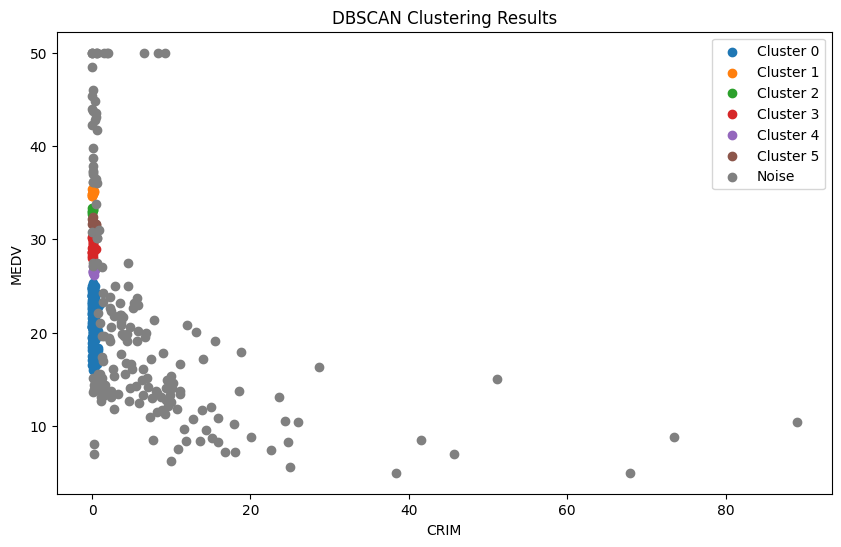

In [ ]:
#DBSCAN Clustering Visualization
plt.figure(figsize=(10, 6))
unique_labels = set(dbscan_labels)
for label in unique_labels:
    if label == -1:
        #Noise
        plt.scatter(data_sample[data_sample['DBSCAN_Labels'] == label]['CRIM'],
                    data_sample[data_sample['DBSCAN_Labels'] == label]['MEDV'],
                    color='gray', label='Noise')
    else:
        plt.scatter(data_sample[data_sample['DBSCAN_Labels'] == label]['CRIM'],
                    data_sample[data_sample['DBSCAN_Labels'] == label]['MEDV'],
                    label=f'Cluster {label}')
plt.title('DBSCAN Clustering Results')
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.legend()
plt.show()
